In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:

url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield'

def yield_curve(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    table = soup.find("table", attrs= {"class":"t-chart"}) 
    rows = table.find_all('tr')
    th_td_list = []
    for row in rows[1:]:
        tds = row.findAll('td')
        th_td_data_row = []
        for td in tds:
            td_text = td.text.strip()
            #print(td_text)
            if td_text == '':
                td_text = 0.0      
            else:
                td_text = td_text
            th_td_data_row.append(td_text)
        th_td_list.append(th_td_data_row)
        #print(th_td_list)
    return th_td_list

yield_curve(url)


[['04/01/21',
  '0.02',
  '0.02',
  '0.02',
  '0.04',
  '0.06',
  '0.17',
  '0.35',
  '0.90',
  '1.37',
  '1.69',
  '2.24',
  '2.34'],
 ['04/02/21',
  '0.02',
  '0.02',
  '0.02',
  '0.04',
  '0.07',
  '0.19',
  '0.39',
  '0.97',
  '1.42',
  '1.72',
  '2.27',
  '2.35'],
 ['04/05/21',
  '0.03',
  '0.02',
  '0.03',
  '0.04',
  '0.06',
  '0.17',
  '0.37',
  '0.94',
  '1.40',
  '1.73',
  '2.28',
  '2.36'],
 ['04/06/21',
  '0.02',
  '0.02',
  '0.02',
  '0.04',
  '0.06',
  '0.16',
  '0.35',
  '0.88',
  '1.34',
  '1.67',
  '2.24',
  '2.32'],
 ['04/07/21',
  '0.01',
  '0.02',
  '0.02',
  '0.04',
  '0.06',
  '0.16',
  '0.34',
  '0.87',
  '1.34',
  '1.68',
  '2.26',
  '2.35'],
 ['04/08/21',
  '0.02',
  '0.02',
  '0.01',
  '0.04',
  '0.05',
  '0.14',
  '0.33',
  '0.85',
  '1.30',
  '1.64',
  '2.22',
  '2.32'],
 ['04/09/21',
  '0.02',
  '0.01',
  '0.02',
  '0.03',
  '0.06',
  '0.16',
  '0.35',
  '0.87',
  '1.33',
  '1.67',
  '2.23',
  '2.34'],
 ['04/12/21',
  '0.02',
  '0.02',
  '0.02',
  '0.04',
 

In [3]:
data = yield_curve(url)
df = pd.DataFrame(data, columns= ["Date", "1 Mo", "2 Mo", "3 Mo", "6 Mo", "1 Yr","2 Yr","3 Yr","5 Yr","7 Yr", "10 Yr", "20 Yr", "30 Yr"])
df

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,04/01/21,0.02,0.02,0.02,0.04,0.06,0.17,0.35,0.90,1.37,1.69,2.24,2.34
1,04/02/21,0.02,0.02,0.02,0.04,0.07,0.19,0.39,0.97,1.42,1.72,2.27,2.35
2,04/05/21,0.03,0.02,0.03,0.04,0.06,0.17,0.37,0.94,1.40,1.73,2.28,2.36
3,04/06/21,0.02,0.02,0.02,0.04,0.06,0.16,0.35,0.88,1.34,1.67,2.24,2.32
4,04/07/21,0.01,0.02,0.02,0.04,0.06,0.16,0.34,0.87,1.34,1.68,2.26,2.35
5,04/08/21,0.02,0.02,0.01,0.04,0.05,0.14,0.33,0.85,1.30,1.64,2.22,2.32
6,04/09/21,0.02,0.01,0.02,0.03,0.06,0.16,0.35,0.87,1.33,1.67,2.23,2.34
7,04/12/21,0.02,0.02,0.02,0.04,0.06,0.18,0.38,0.89,1.35,1.69,2.24,2.34
8,04/13/21,0.03,0.02,0.03,0.05,0.06,0.16,0.35,0.85,1.29,1.64,2.21,2.32
9,04/14/21,0.02,0.02,0.02,0.04,0.06,0.16,0.35,0.87,1.31,1.64,2.22,2.32


In [4]:
df = df.astype({"1 Mo": "float64", "2 Mo": "float64", "3 Mo": "float64", "6 Mo": "float64", "1 Yr": "float64", "2 Yr": "float64", "3 Yr": "float64", \
           "5 Yr": "float64", "7 Yr": "float64", "10 Yr": "float64", "20 Yr": "float64", "30 Yr": "float64"})


In [5]:
dates = tuple([i for i in df["Date"].value_counts().keys()])
#dates

In [6]:
values = df[["1 Yr","2 Yr","3 Yr","5 Yr","7 Yr", "10 Yr", "20 Yr", "30 Yr"]]
#values

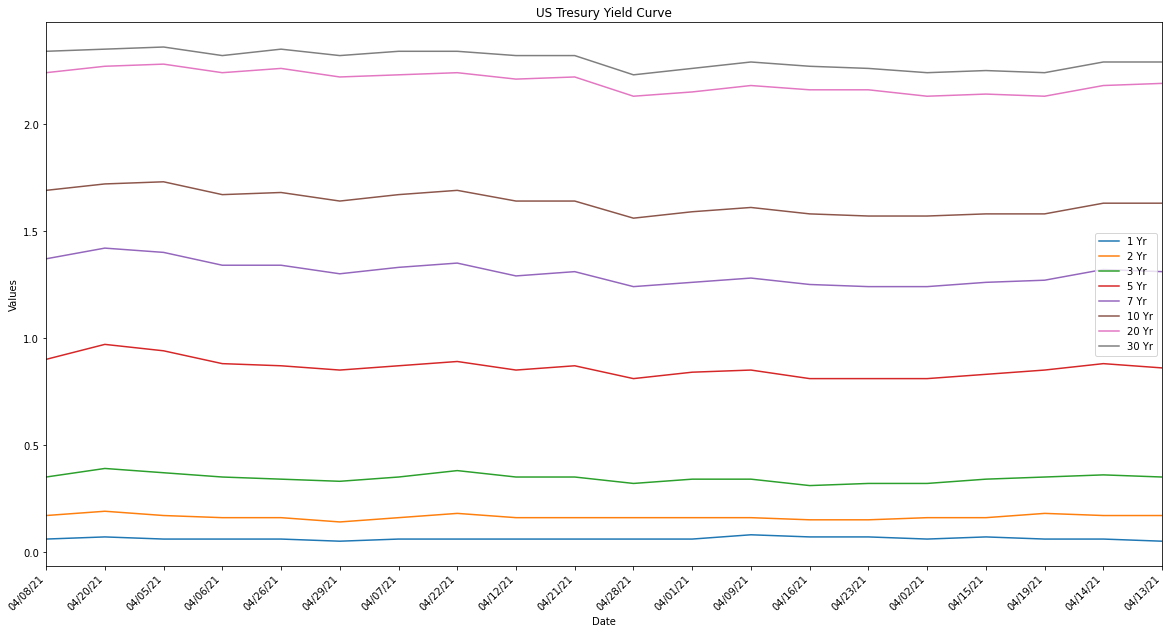

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(dates,values)
ax.set_xlabel("Date")
ax.set_ylabel("Values")
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 19], title='US Tresury Yield Curve')
ax.legend(["1 Yr","2 Yr","3 Yr","5 Yr","7 Yr", "10 Yr", "20 Yr", "30 Yr"])
plt.show()